In [1]:
from PIL import Image
import cv2
import numpy as np

In [2]:
def find_template_location(image, template):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    best = None

    for scale in np.linspace(0.6, 1.4, 20):
        resized = cv2.resize(template, None, fx=scale, fy=scale)
        th, tw = resized.shape

        if th > image.shape[0] or tw > image.shape[1]:
            continue

        res = cv2.matchTemplate(image, resized, cv2.TM_CCOEFF_NORMED)
        _, val, _, loc = cv2.minMaxLoc(res)

        if best is None or val > best[0]:
            best = (val, loc, (tw, th))

    val, (x, y), (w, h) = best
    bbox = (x, y, x + w, y + h)

    return val, bbox

In [3]:
import imagehash

def are_images_visually_similar(img1, img2, cutoff=9):
    """
    Checks if two images are visually similar using average hashing.
    A lower cutoff means higher similarity (0 is identical).
    """
    try:
        hash1 = imagehash.average_hash(img1)
        hash2 = imagehash.average_hash(img2)

        # Calculate the difference (Hamming distance) between hashes
        hash_diff = hash1 - hash2

        if hash_diff < cutoff:
            return True
        else:
            return False
    except FileNotFoundError:
        return False

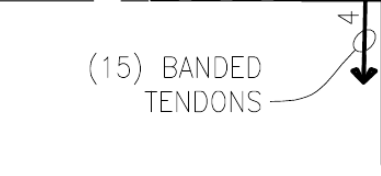

In [4]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-35.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

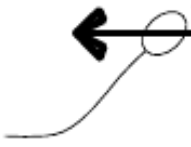

In [5]:
template = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/left-bottom.png", cv2.IMREAD_COLOR)
Image.fromarray(template)

0.8245128989219666
True


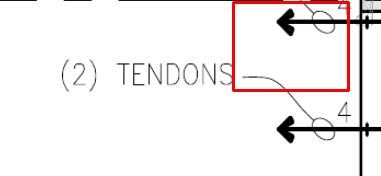

In [6]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-58.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.5659945607185364
False


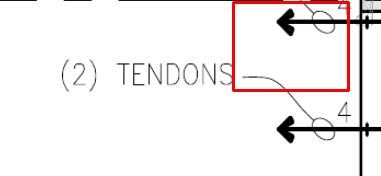

In [7]:
val, bbox = find_template_location(img, template)
x1, y1, x2, y2 = bbox
print(val)
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

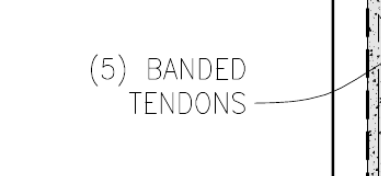

In [8]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 19-17-47.png", cv2.IMREAD_COLOR)
Image.fromarray(img)

0.6545361876487732
False


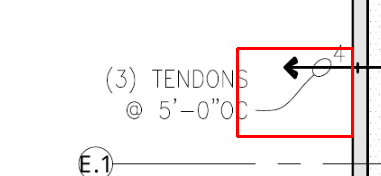

In [9]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-12.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.39490917325019836
False


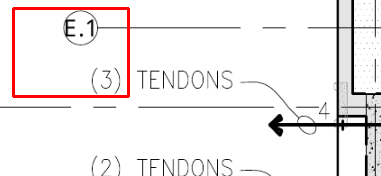

In [10]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-20.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.743116557598114
True


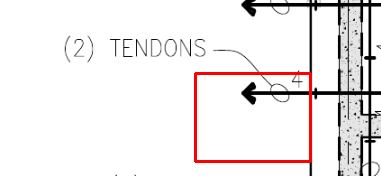

In [11]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-24.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.3618846833705902
False


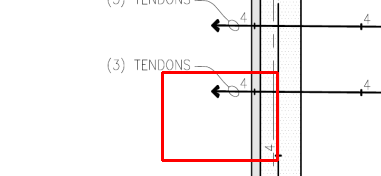

In [12]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-40.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.2028014361858368
False


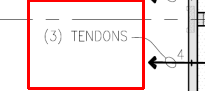

In [13]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-12-56.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.12082718312740326
False


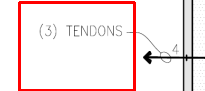

In [14]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-13-00.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.06667061150074005
False


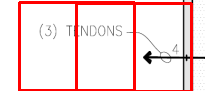

In [15]:
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.17479538917541504
False


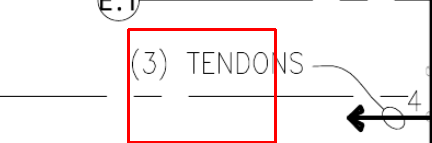

In [16]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-13-24.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img)

0.8026955127716064
True


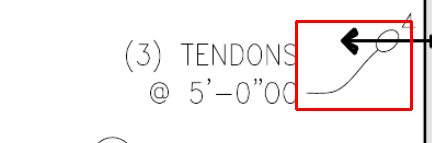

In [17]:
img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/examples/Screenshot from 2025-12-28 20-13-29.png", cv2.IMREAD_COLOR)
val, bbox = find_template_location(img, template)
print(val)
x1, y1, x2, y2 = bbox
img_crop = img[y1:y2, x1:x2]
print(are_images_visually_similar(Image.fromarray(template), Image.fromarray(img_crop)))
img_copy = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
Image.fromarray(img_copy)